# Exploratory Data Analysis: an end-to-end example

1. How to work with the filesystem
2. How to work with CSV files
3. How to do exploratory data analysis (EDA)
4. How to display images in a grid
5. How to create a Kaggle submission file

<iframe width="560" height="315" src="https://www.youtube.com/embed/1vUeDkORVcA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## 1. How to work with the filesystem & directories

In [1]:
# You can use shell commands with "!"
!ls ../input

sample_submission.csv  test  train  train.csv


In [2]:
# Pipe output to do basic analysis
!ls ../input/train/ | wc -l
!ls ../input/train/ | head

124288
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_green.png
ls: write error: Broken pipe


In [3]:
!ls ../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_*.png

../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
../input/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png


In [4]:
# Better approach: use pathlib
from pathlib import Path

DATA_DIR = Path('../input')
TRAIN_DIR = DATA_DIR/'train'
TEST_DIR = DATA_DIR/'test'

In [5]:
list(set([str(fn).split('/')[-1].split('_')[0] for fn in TEST_DIR.iterdir()]))[:10]

['8eeb12a2-bad1-11e8-b2b8-ac1f6b6435d0',
 '2ba6c4f6-bad7-11e8-b2b9-ac1f6b6435d0',
 'a3144ca4-bad0-11e8-b2b8-ac1f6b6435d0',
 '89bd55e4-bad4-11e8-b2b8-ac1f6b6435d0',
 'e6a8c85c-bace-11e8-b2b8-ac1f6b6435d0',
 '508ea55c-baca-11e8-b2b8-ac1f6b6435d0',
 'fddbebb2-bad3-11e8-b2b8-ac1f6b6435d0',
 '0cec7174-bac7-11e8-b2b7-ac1f6b6435d0',
 'd2877bb6-bace-11e8-b2b8-ac1f6b6435d0',
 '8ba13666-bad2-11e8-b2b8-ac1f6b6435d0']

In [6]:
# Use the full power of Python
test_ids = list(set([str(fn).split('/')[-1].split('_')[0]  for fn in TEST_DIR.iterdir()]))
print('Test IDs:', len(test_ids))
test_ids[:10]

Test IDs: 11702


['8eeb12a2-bad1-11e8-b2b8-ac1f6b6435d0',
 '2ba6c4f6-bad7-11e8-b2b9-ac1f6b6435d0',
 'a3144ca4-bad0-11e8-b2b8-ac1f6b6435d0',
 '89bd55e4-bad4-11e8-b2b8-ac1f6b6435d0',
 'e6a8c85c-bace-11e8-b2b8-ac1f6b6435d0',
 '508ea55c-baca-11e8-b2b8-ac1f6b6435d0',
 'fddbebb2-bad3-11e8-b2b8-ac1f6b6435d0',
 '0cec7174-bac7-11e8-b2b7-ac1f6b6435d0',
 'd2877bb6-bace-11e8-b2b8-ac1f6b6435d0',
 '8ba13666-bad2-11e8-b2b8-ac1f6b6435d0']

In [7]:
# You can even create directories
SUB_DIR = Path('files/submissions')
SUB_DIR.mkdir(parents=True, exist_ok=True)
!ls files

submissions


Learn more here: https://docs.python.org/3/library/pathlib.html

## 2. How to work with CSV files

In [8]:
# You could always use shell commands
LABELS_CSV = DATA_DIR/'train.csv'
!head {LABELS_CSV}

Id,Target
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0


In [9]:
# Enter pandas
import pandas as pd

train_df = pd.read_csv(LABELS_CSV, index_col='Id')
train_df.head(10)

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0


In [10]:
# You can look at a random sample
train_df.sample(10)

,Target
Id,
8e26db5e-bbc5-11e8-b2bc-ac1f6b6435d0,25 11
46eaa1a0-bba0-11e8-b2b9-ac1f6b6435d0,2
c6e69c1c-bbb2-11e8-b2ba-ac1f6b6435d0,2
db59681e-bba3-11e8-b2b9-ac1f6b6435d0,0 21
c699d9ea-bba8-11e8-b2ba-ac1f6b6435d0,25
42707e1e-bba1-11e8-b2b9-ac1f6b6435d0,24 0
280f88c2-bba5-11e8-b2ba-ac1f6b6435d0,0
3e527fb4-bbb3-11e8-b2ba-ac1f6b6435d0,23
daf8d54a-bbb6-11e8-b2ba-ac1f6b6435d0,18


In [11]:
# Or get basic information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31072 entries, 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0 to fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0
Data columns (total 1 columns):
Target    31072 non-null object
dtypes: object(1)
memory usage: 485.5+ KB


In [12]:
# Use Python to your advantage
train_df['Target'] = train_df['Target'].str.split(' ').map(lambda x: list(map(int, x)))
train_df.head(10)

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1]
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18]
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0]
0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]"
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0]
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]"


## 3. How to do Exploratory Data Analysis (EDA)

Pandas dataframe is a great starting point for doing EDA. It provides many utilities for plotting graphs right out of the box.

In [13]:
label_names = ["Nucleoplasm", "Nuclear membrane", "Nucleoli", "Nucleoli fibrillar center", 
               "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", 
               "Golgi apparatus", "Peroxisomes", "Endosomes","Lysosomes", 
               "Intermediate filaments", "Actin filaments", "Focal adhesion sites", 
               "Microtubules", "Microtubule ends", "Cytokinetic bridge", "Mitotic spindle", 
               "Microtubule organizing center", "Centrosome", "Lipid droplets", 
               "Plasma membrane", "Cell junctions", "Mitochondria", "Aggresome",   
               "Cytosol", "Cytoplasmic bodies", "Rods & rings"]

In [14]:
import numpy as np

def get_label_freqs(targets, label_names, ascending=None):
    n_classes = len(label_names)
    freqs = np.array([0] * n_classes)
    for lst in targets:
        for c in range(n_classes):
            freqs[c] += c in lst
    data = {
        'name': label_names, 
        'frequency': freqs, 
        'percent': (10000 * freqs / len(targets)).astype(int) / 100.,
    }
    cols = ['name', 'frequency', 'percent']
    df = pd.DataFrame(data, columns=cols)
    if ascending is not None:
        df = df.sort_values(by='frequency', ascending=ascending)
    return df

In [15]:
# Create a frequency table
train_freqs = get_label_freqs(train_df.Target, label_names, ascending=False)
train_freqs

,name,frequency,percent
0,Nucleoplasm,12885,41.46
25,Cytosol,8228,26.48
21,Plasma membrane,3777,12.15
2,Nucleoli,3621,11.65
23,Mitochondria,2965,9.54
7,Golgi apparatus,2822,9.08
5,Nuclear bodies,2513,8.08
4,Nuclear speckles,1858,5.97
3,Nucleoli fibrillar center,1561,5.02
19,Centrosome,1482,4.76


Clearly, there is a huge imbalance between the classes, and **15 of the 28 classes have less than 900 samples (~ 3% of the data)**, and 9 classes have fewer than 330 samples (~1% of the data). Any model which always predicts 0 or 'not present' for these classes is already 97% accurate.

So, it's going to be really difficult to train a model that can detect the less frequently occuring classes. This may lead to a recall of 0, which will lead to and F1 score of 0 for these classes, thus putting a ceiling of 0.465 on the evaluation metric. In fact, we might need to train a separate model for these classes.

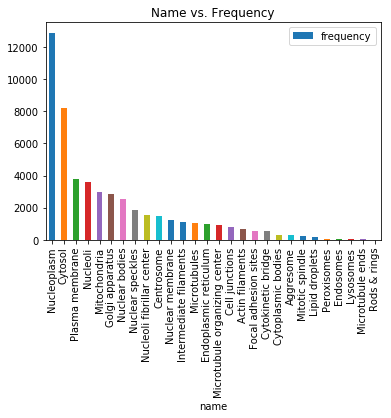

In [16]:
# Visualize the frequency table using a chart
train_freqs.plot(x='name', y='frequency', kind='bar', title='Name vs. Frequency');

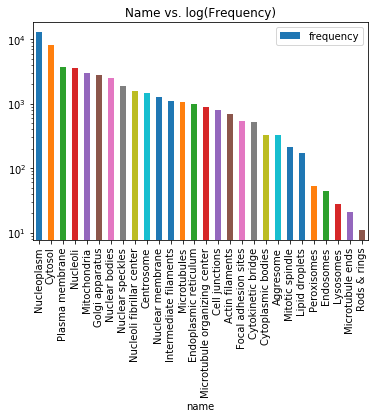

In [17]:
# Use logarithmic axis for easier interpretation
train_freqs.plot(x='name', y='frequency', kind='bar', logy=True, title='Name vs. log(Frequency)');

## 4. How to display an image, or show multiple images in a grid?

In [18]:
train_sample = "ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_red.png"

(512, 512)


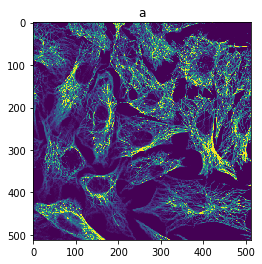

In [19]:
from imageio import imread
import matplotlib.pyplot as plt

# Look at one channel/filter
img0 = imread(str(TRAIN_DIR/train_sample))
print(img0.shape)
plt.imshow(img0)
plt.title(train_sample[0]);

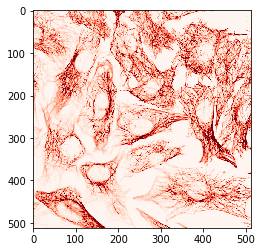

In [20]:
# Use a color map for grayscale images
plt.imshow(img0, cmap="Reds");

In [21]:
# For RGB images, it "just works"
!curl https://www.what-dog.net/Images/faces2/scroll001.jpg -o sample.jpg

img = imread('sample.jpg')
plt.imshow(img);

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


RuntimeError: Exception thrown in SimpleITK ReadImage: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:107:
sitk::ERROR: Unable to determine ImageIO reader for "/kaggle/working/sample.jpg"

In [22]:
!ls {TRAIN_DIR}/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_*.png

../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_blue.png
../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_green.png
../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_red.png
../input/train/ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0_yellow.png


In [23]:
CHANNELS = ['green', 'red', 'blue', 'yellow']

# Load images for multiple channels
def load_image(image_id, channels=CHANNELS, img_dir=TRAIN_DIR):
    image = np.zeros(shape=(len(channels),512,512))
    for i, ch in enumerate(channels):
        image[i,:,:] = imread(str(img_dir/f'{image_id}_{ch}.png'))
    return image

In [24]:
# Plot multiple images in a grid
def show_image_filters(image, title, figsize=(16,5)):
    fig, subax = plt.subplots(1, 4, figsize=figsize)
    # Green channel
    subax[0].imshow(image[0], cmap="Greens")
    subax[0].set_title(title)
    # Red channel
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("Microtubules")
    # Blue channel
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("Nucleus")
    # Orange channel
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("Endoplasmatic reticulum")
    return subax

In [25]:
# Use the traning data to show appropriate labels
def get_labels(image_id):
    labels = [label_names[x] for x in train_df.loc[image_id]['Target']]
    return ', '.join(labels)

(4, 512, 512)


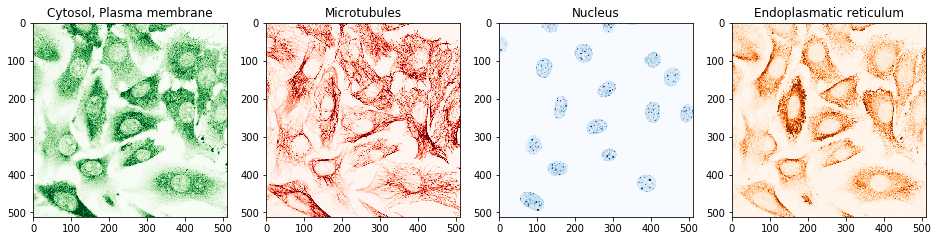

In [26]:
# Look at a sample grid
img_id = 'ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0'
img, title = load_image(img_id), get_labels(img_id)
show_image_filters(img, title);
print(img.shape)

bd9fcaf0-bb9b-11e8-b2b9-ac1f6b6435d0
9b6cca7c-bbb0-11e8-b2ba-ac1f6b6435d0
ccc255c6-bbb8-11e8-b2ba-ac1f6b6435d0


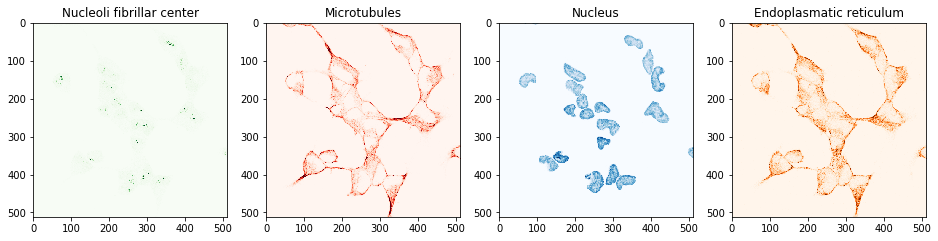

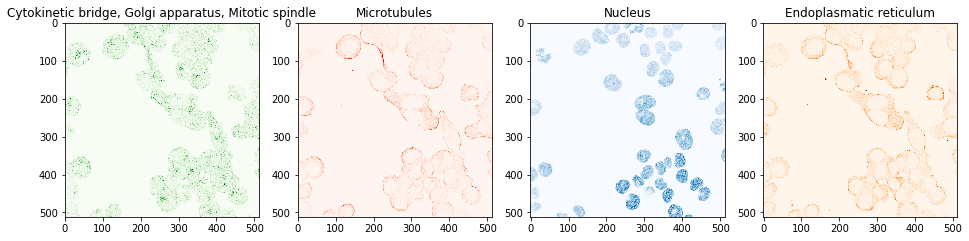

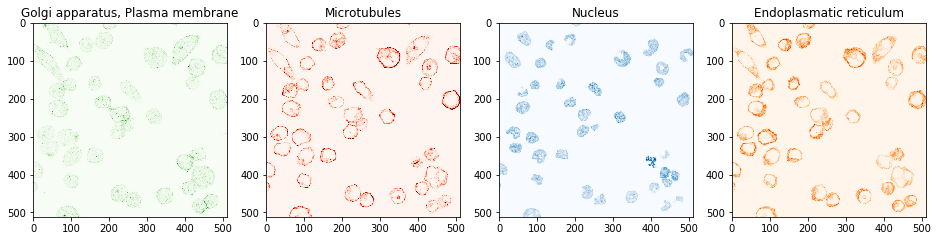

In [27]:
# Combine with pandas to view a random sample
for img_id in train_df.sample(3).index:
    print(img_id)
    img, title = load_image(img_id), get_labels(img_id)
    show_image_filters(img, title)

## 5. How to generate a submission file?

In [28]:
# Let's define a sophisticated and highly accurate model
def model(inputs):
    return np.random.randn(len(inputs), len(label_names))

In [29]:
# Generate some predictions (logits)
preds = model(test_ids)
print(preds.shape)
print(preds)

(11702, 28)
[[ 1.21095335 -0.13454742  0.31795476 ... -1.19706574  0.22678561
   0.20168155]
 [-0.20598686  0.38581666 -0.10353391 ...  0.25616796  0.69642912
   1.22472205]
 [ 0.17575899  0.09029611 -0.95872055 ...  1.19647286 -0.16934991
   0.81132486]
 ...
 [ 0.22809472  0.05324907 -1.38883445 ... -0.94397544 -0.03040959
   0.14719611]
 [-1.26562166 -0.68588074 -0.35648567 ...  0.22460545  0.41419966
   1.41153975]
 [ 0.11723396  0.51095365  0.09750546 ... -0.43121423  1.09032031
  -1.5945559 ]]


In [30]:
# Convert them into probabilities
def sigmoid(x):
    return np.reciprocal(np.exp(-x) + 1) 

probs = sigmoid(preds)
probs

array([[0.77046759, 0.4664138 , 0.57882573, ..., 0.23199762, 0.55645465,
        0.55025017],
       [0.4486846 , 0.59527524, 0.47413962, ..., 0.56369406, 0.66739559,
        0.77289347],
       [0.54382698, 0.5225587 , 0.27713444, ..., 0.76789673, 0.45776342,
        0.69239175],
       ...,
       [0.55677773, 0.51330912, 0.19959389, ..., 0.28009802, 0.49239819,
        0.53673273],
       [0.22000767, 0.33495005, 0.41181055, ..., 0.55591649, 0.60209445,
        0.80400869],
       [0.52927497, 0.62503   , 0.52435707, ..., 0.39383642, 0.74844203,
        0.16874388]])

In [31]:
# Convert probabilities into labels
def make_labels(y, thres=0.5):
    return ' '.join([str(i) for i, p in enumerate(y) if p > thres])

make_labels(probs[0])

'0 2 3 5 7 9 11 12 16 20 21 22 23 24 26 27'

In [32]:
# Create a pandas dataframe
labels = list(map(make_labels, probs))
sub_df = pd.DataFrame({ 'Id': test_ids, 'Predicted': labels}, columns=['Id', 'Predicted'])
sub_df.head(10)

,Id,Predicted
0,8eeb12a2-bad1-11e8-b2b8-ac1f6b6435d0,0 2 3 5 7 9 11 12 16 20 21 22 23 24 26 27
1,2ba6c4f6-bad7-11e8-b2b9-ac1f6b6435d0,1 3 4 5 7 9 12 13 15 16 17 20 22 25 26 27
2,a3144ca4-bad0-11e8-b2b8-ac1f6b6435d0,0 1 3 6 8 9 11 12 13 14 15 16 19 20 25 27
3,89bd55e4-bad4-11e8-b2b8-ac1f6b6435d0,0 1 4 5 7 8 10 12 14 15 17 18 19 22 24 25 26 27
4,e6a8c85c-bace-11e8-b2b8-ac1f6b6435d0,2 5 7 8 9 12 13 16 17 18 21 23
5,508ea55c-baca-11e8-b2b8-ac1f6b6435d0,1 2 3 4 8 11 14 17 23 26
6,fddbebb2-bad3-11e8-b2b8-ac1f6b6435d0,2 6 11 12 14 18 19 20 21 23 27
7,0cec7174-bac7-11e8-b2b7-ac1f6b6435d0,2 4 5 7 13 14 15 19 23 25 26
8,d2877bb6-bace-11e8-b2b8-ac1f6b6435d0,3 4 6 9 11 14 15 17 22 25 26
9,8ba13666-bad2-11e8-b2b8-ac1f6b6435d0,0 1 3 4 5 6 10 11 12 18 20 23 25 26 27


In [33]:
# Export it to a file and make sure it looks okay
sub_fname = SUB_DIR/'basic.csv'
sub_df.to_csv(sub_fname, index=None)

!head {sub_fname}

Id,Predicted
8eeb12a2-bad1-11e8-b2b8-ac1f6b6435d0,0 2 3 5 7 9 11 12 16 20 21 22 23 24 26 27
2ba6c4f6-bad7-11e8-b2b9-ac1f6b6435d0,1 3 4 5 7 9 12 13 15 16 17 20 22 25 26 27
a3144ca4-bad0-11e8-b2b8-ac1f6b6435d0,0 1 3 6 8 9 11 12 13 14 15 16 19 20 25 27
89bd55e4-bad4-11e8-b2b8-ac1f6b6435d0,0 1 4 5 7 8 10 12 14 15 17 18 19 22 24 25 26 27
e6a8c85c-bace-11e8-b2b8-ac1f6b6435d0,2 5 7 8 9 12 13 16 17 18 21 23
508ea55c-baca-11e8-b2b8-ac1f6b6435d0,1 2 3 4 8 11 14 17 23 26
fddbebb2-bad3-11e8-b2b8-ac1f6b6435d0,2 6 11 12 14 18 19 20 21 23 27
0cec7174-bac7-11e8-b2b7-ac1f6b6435d0,2 4 5 7 13 14 15 19 23 25 26
d2877bb6-bace-11e8-b2b8-ac1f6b6435d0,3 4 6 9 11 14 15 17 22 25 26


In [34]:
# Use FileLink to download the file
from IPython.display import FileLink

FileLink(sub_fname)

/kaggle/working/files/submissions/basic.csv

The last but **MOST IMPORTANT** step is to take all of the above code (once it works as expected), and wrap it into a function (or two)

In [35]:
def make_sub(fname):
    preds = model(test_ids)
    probs = sigmoid(preds)
    labels = list(map(make_labels, probs))
    sub_df = pd.DataFrame({ 'Id': test_ids, 'Predicted': labels}, columns=['Id', 'Predicted'])
    fpath = SUB_DIR/fname
    sub_df.to_csv(fpath, index=None)
    !head {fpath}
    return FileLink(fpath)

In [36]:
make_sub('best_submission.csv')

Id,Predicted
8eeb12a2-bad1-11e8-b2b8-ac1f6b6435d0,7 9 10 11 14 16 19 20 21 22 24 25
2ba6c4f6-bad7-11e8-b2b9-ac1f6b6435d0,1 2 5 8 10 15 19 23 25
a3144ca4-bad0-11e8-b2b8-ac1f6b6435d0,1 2 3 6 8 10 12 15 16 17 19 21 23 24 27
89bd55e4-bad4-11e8-b2b8-ac1f6b6435d0,0 3 6 9 12 15 17 19 20 21 24 25 26 27
e6a8c85c-bace-11e8-b2b8-ac1f6b6435d0,0 1 4 5 7 8 12 13 15 17 18 20 23 24 27
508ea55c-baca-11e8-b2b8-ac1f6b6435d0,1 2 3 5 6 8 11 12 13 20 21 23 24
fddbebb2-bad3-11e8-b2b8-ac1f6b6435d0,4 8 9 10 14 20 21 23 24 25 26 27
0cec7174-bac7-11e8-b2b7-ac1f6b6435d0,0 1 3 4 5 9 10 13 14 15 16 19 25 27
d2877bb6-bace-11e8-b2b8-ac1f6b6435d0,1 6 8 10 16 17 18 19 21 22 23 25


/kaggle/working/files/submissions/best_submission.csv

Now you can generate test predictions with a single line of code!

# Save and commit
Finally, we you save and commit out work using Jovian, so that anyone (including you), can reproduce it later with a single command, on any machine.

In [37]:
!pip install jovian --upgrade -q

You are using pip version 18.1, however version 20.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
import jovian

<IPython.core.display.Javascript object>

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: Failed to detect notebook filename. Please provide the correct notebook filename as the "filename" argument to "jovian.commit".
